# Importing Libararies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading the dataset

In [4]:
df = pd.read_excel('C:/Users/awan/Downloads/orders_pakistani_market_dataset.xlsx')
df.head()

,Product ID,Product Name,Category,Unit Price (PKR),Supplier,Stock Available,Sub-Category
0,PK-PROD-5001,milk powder,Dairy,203.12,Supplier Faisalabad,190,Grade 2
1,PK-PROD-5002,green tea,Beverages,264.77,Supplier Islamabad,519,Grade 2
2,PK-PROD-5003,component b,Electronics,1066.56,Supplier Multan,836,Grade 1
3,PK-PROD-5004,black pepper,Spices,353.07,Supplier Lahore,851,Grade 1
4,PK-PROD-5005,tandoori masala,Spices,426.67,Supplier Lahore,383,Grade 1


# Checking missing values

In [4]:
df.isnull().sum().sort_values(ascending = False)

Product ID          0
Product Name        0
Category            0
Unit Price (PKR)    0
Supplier            0
Stock Available     0
Sub-Category        0
dtype: int64

# Perfroming Encoding to create the heatmap of the columns

In [5]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object using LabelEncoder() in for loop for categorical columns
# Columns to encode
columns_to_encode = ['Product Name',	'Category',		'Supplier',		'Sub-Category']

# Dictionary to store LabelEncoders for each column
label_encoders = {}

# Loop to apply LabelEncoder to each column for encoding
for col in columns_to_encode:
    # Create a new LabelEncoder for the column
    le = LabelEncoder()
    # Fit and transform the data
    df[col] = le.fit_transform(df[col])
    # Store the encoder in the dictionary
    label_encoders[col] = le
df.head()

,Product ID,Product Name,Category,Unit Price (PKR),Supplier,Stock Available,Sub-Category
0,PK-PROD-5001,7,1,203.12,0,190,1
1,PK-PROD-5002,6,0,264.77,1,519,1
2,PK-PROD-5003,3,2,1066.56,4,836,0
3,PK-PROD-5004,1,4,353.07,3,851,0
4,PK-PROD-5005,10,4,426.67,3,383,0


 # Let's Check the relationship of the features

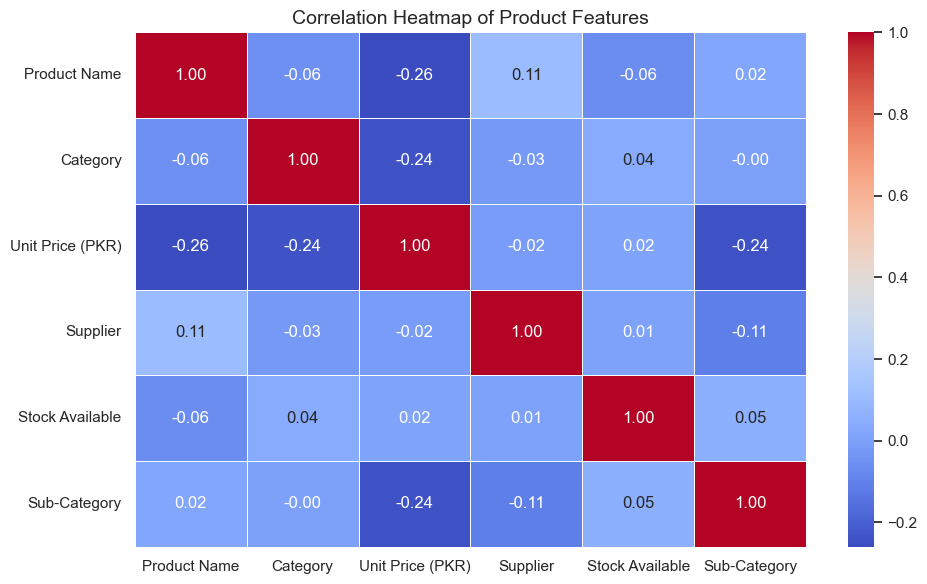

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Copy DataFrame to avoid changing original
df_encoded = df.copy()

# Columns to encode (non-numeric)
cols_to_encode = ['Product Name', 'Category', 'Supplier', 'Sub-Category']

# Apply label encoding to categorical columns
le = LabelEncoder()
for col in cols_to_encode:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Select relevant columns
cols = ['Product Name', 'Category', 'Unit Price (PKR)', 'Supplier', 'Stock Available', 'Sub-Category']

# Compute correlation matrix
corr = df_encoded[cols].corr()

# Set figure size and style
plt.figure(figsize=(10, 6))
sns.set(style='white')

# Plot heatmap with annotations
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title and layout
plt.title('Correlation Heatmap of Product Features', fontsize=14)
plt.tight_layout()
plt.show()


## 📊 Correlation Heatmap Insights

This heatmap displays the linear relationships between product features. Correlation values range from **-1 to +1**.

---

### 🔹 Key Takeaways:

- **Low overall correlation** → Most features are **independent**.
- **Unit Price (PKR)** shows **moderate negative correlation** with:
  - `Product Name`: -0.26  
  - `Category`: -0.24  
  - `Sub-Category`: -0.24
- `Product Name` and `Supplier`: slight **positive correlation** (0.11)
- `Stock Available`: weak or no correlation with other features
- `Category` & `Sub-Category`: near-zero correlation — may indicate a **data issue**

---

### ✅ Summary

The dataset shows high feature independence, which can be beneficial for certain machine learning models. It’s recommended to review **categorical encodings** for accuracy.


# Performing inverse transform to get back the orignal categories

In [8]:
# Inverse transform for encoded columns
for col in columns_to_encode:
    # Retrieve the corresponding LabelEncoder for the column
    le = label_encoders[col]
    # Inverse transform the data and convert to integer type
    df[col] = le.inverse_transform(df[col].astype(int))
df.head()

,Product ID,Product Name,Category,Unit Price (PKR),Supplier,Stock Available,Sub-Category
0,PK-PROD-5001,milk powder,Dairy,203.12,Supplier Faisalabad,190,Grade 2
1,PK-PROD-5002,green tea,Beverages,264.77,Supplier Islamabad,519,Grade 2
2,PK-PROD-5003,component b,Electronics,1066.56,Supplier Multan,836,Grade 1
3,PK-PROD-5004,black pepper,Spices,353.07,Supplier Lahore,851,Grade 1
4,PK-PROD-5005,tandoori masala,Spices,426.67,Supplier Lahore,383,Grade 1


### 📊 Categorical Feature Distribution

This visualization shows the distribution of key categorical features in the dataset (`Product Name`, `Category`, `Supplier`, and `Sub-Category`). Count plots help identify class imbalances and dominant categories, which are important for exploratory data analysis (EDA).


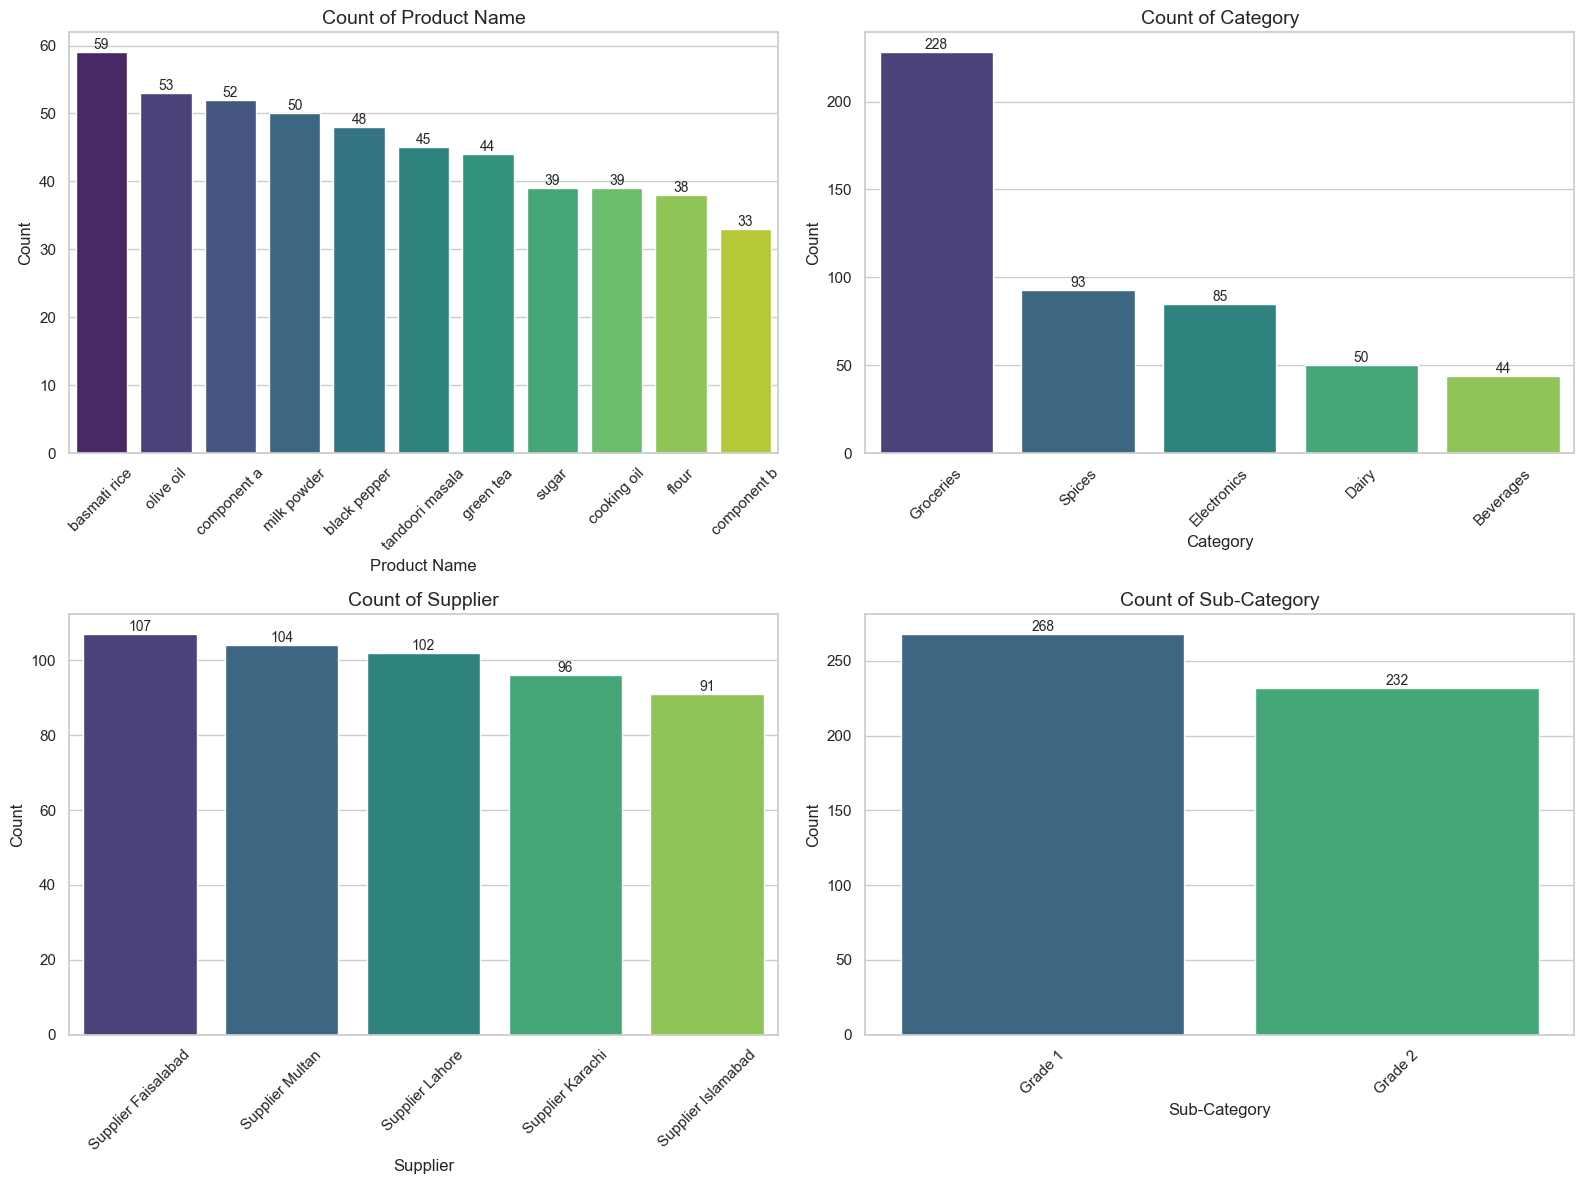

In [5]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Define the columns to plot
columns = ['Product Name', 'Category', 'Supplier', 'Sub-Category']
n_cols = 2
n_rows = (len(columns) + 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten()  # Flatten for easy indexing

# Plot countplots with value labels
for i, col in enumerate(columns):
    ax = axes[i]
    order = df[col].value_counts().index  # Optional: sort bars by count
    plot = sns.countplot(data=df, x=col, ax=ax, order=order, palette='viridis')
    
    ax.set_title(f'Count of {col}', fontsize=14)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

    # Add value labels on top of bars
    for p in plot.patches:
        height = int(p.get_height())
        plot.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', fontsize=10)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## 🛒 Product Sales Insights

---

### 🥇 Top Products
- **Most Sold:**  
  - *Basmati Rice* and *Olive Oil* are the most frequently sold products.
- **Insight:**  
  - These items show **high demand** in the dataset.

---

### 🛍️ Dominant Categories
- **Leading Category:**  
  - *Groceries* is the largest category.
  - Followed by *Spices* and *Electronics*.
- **Trend:**  
  - Indicates a strong **focus on food-related items**.

---

### 🚚 Supplier Performance
- **Top Suppliers by Count:**  
  - *Supplier Faisalabad*  
  - *Supplier Multan*  
  - *Supplier Lahore*
- **Trend:**  
  - Multiple suppliers are active, with a **slight lead among the top three**.

---

### 📦 Sub-Category Distribution
- **Grade Distribution:**  
  - *Grade 1* products are more common than *Grade 2*.
- **Trend:**  
  - Suggests a **market preference or availability** for *Grade 1* items.



### 📈 Numerical Feature Distributions

This pair of histograms visualizes the distributions of two key numerical variables: **Unit Price (PKR)** and **Stock Available**. KDE (Kernel Density Estimation) lines are included to better understand the shape of each distribution.


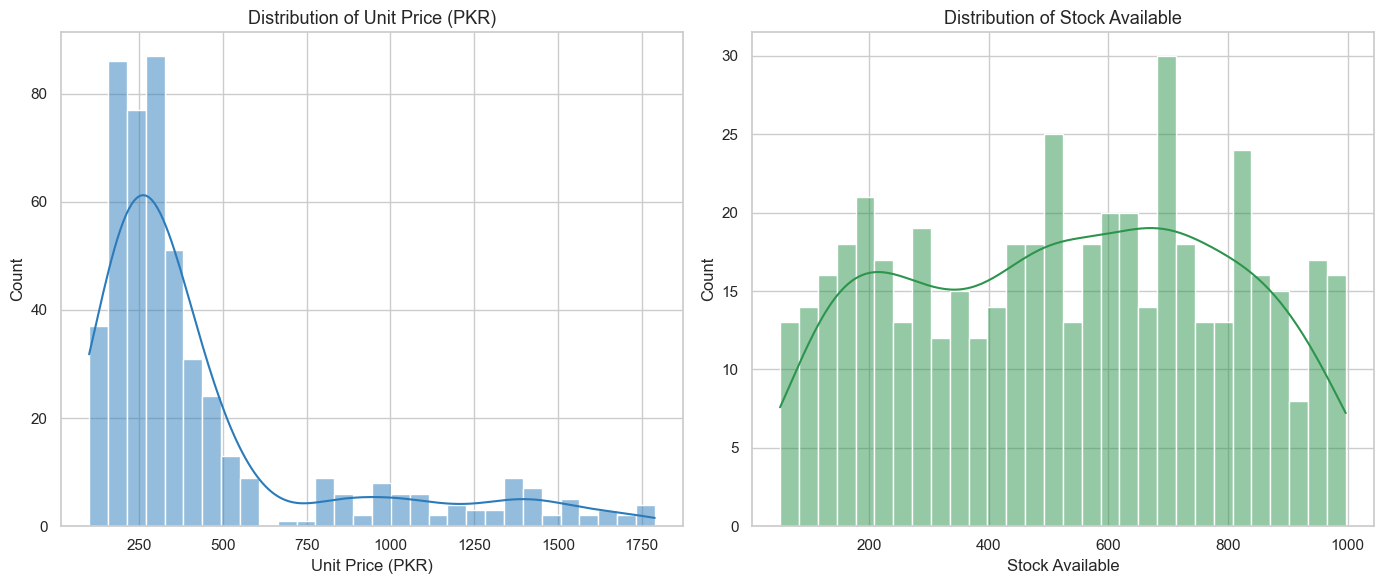

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure with 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for Unit Price (PKR)
sns.histplot(data=df, x='Unit Price (PKR)', bins=30, kde=True, ax=axes[0], color=sns.color_palette("Blues")[4])
axes[0].set_title('Distribution of Unit Price (PKR)', fontsize=13)
axes[0].set_xlabel('Unit Price (PKR)')
axes[0].set_ylabel('Count')

# Histogram for Stock Available
sns.histplot(data=df, x='Stock Available', bins=30, kde=True, ax=axes[1], color=sns.color_palette("Greens")[4])
axes[1].set_title('Distribution of Stock Available', fontsize=13)
axes[1].set_xlabel('Stock Available')
axes[1].set_ylabel('Count')

# Layout adjustment
plt.tight_layout()
plt.show()


## 📦 Insights from Product Sales Data Visualizations

---

### 1️⃣ Unit Price Distribution (PKR)

- **What We See:**
  - Most products are priced between **PKR 200–400**.
  - A few products are much more expensive (long tail).

- **Trend:**
  - The dataset mostly includes **low-priced items**.
  - This shows that **affordable products are sold in high volume**.

---

### 2️⃣ Stock Available Distribution

- **What We See:**
  - Stock quantities are **spread out** — no single stock level is dominant.
  - The shape looks **uniform or multi-modal**.

- **Trend:**
  - Inventory levels vary a lot.
  - This may mean there are **different types of products** or **different stock strategies** being used.



### 💼 Which products command the highest average unit price in PKR—and how do they compare across the catalog?


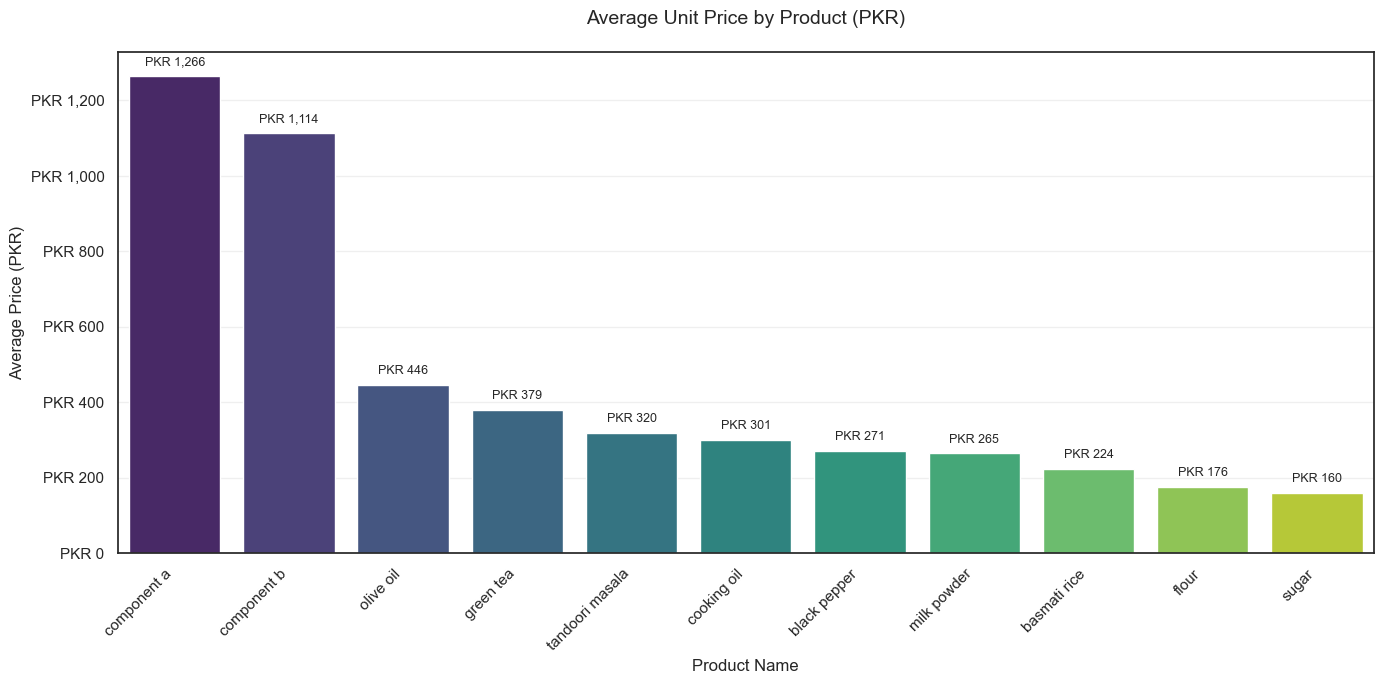

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate average unit price per product
avg_prices = df.groupby('Product Name')['Unit Price (PKR)'].mean().sort_values(ascending=False).reset_index()

# Create the plot with corrected palette usage
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x='Product Name', 
    y='Unit Price (PKR)', 
    data=avg_prices, 
    hue='Product Name',  # Added to address warning
    palette="viridis",
    legend=False,       # Hide legend since colors are self-explanatory
    dodge=False         # Prevent bar shifting
)

# Add PKR values on top of bars
for p in ax.patches:
    ax.annotate(
        f"PKR {p.get_height():,.0f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=9
    )

# Customize the plot
plt.title('Average Unit Price by Product (PKR)', pad=20, fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Average Price (PKR)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Format y-axis with PKR and comma separators
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "PKR {:,.0f}".format(x)))

plt.tight_layout()
plt.show()

## 📊 Insights from "Average Unit Price by Product (PKR)" Bar Plot

---

### 💸 Wide Price Range
- Prices range from **PKR 160 (Sugar)** to **PKR 1,266 (Component A)**.
- Shows a mix of **low-cost daily items** and **high-value specialized products**.

---

### 🔝 High-Priced Products
- **Component A (PKR 1,266)** and **Component B (PKR 1,114)** are the most expensive.
- Their prices are **more than double** the next product (Olive Oil).
- Likely premium or technical items, high value even if sold in low volume.

---

### ⚖️ Mid-Range Products
- Items like **Olive Oil (PKR 446)** and **Green Tea (PKR 379)** are mid-priced.
- Possibly **common household items** with moderate pricing.

---

### 🛒 Low-Cost Essentials
- **Flour (PKR 178)** and **Sugar (PKR 160)** are the cheapest.
- Represent **basic grocery items**, likely sold in large volumes.

---

### 📉 Price Clustering
- Apart from the top 2 components, **most products fall between PKR 160–320**.
- Suggests the product catalog is mostly **affordable daily-use items**.



### 🧐 Within each sub-category, which products stand out with the highest average unit prices in PKR—and how do pricing patterns vary across categories?


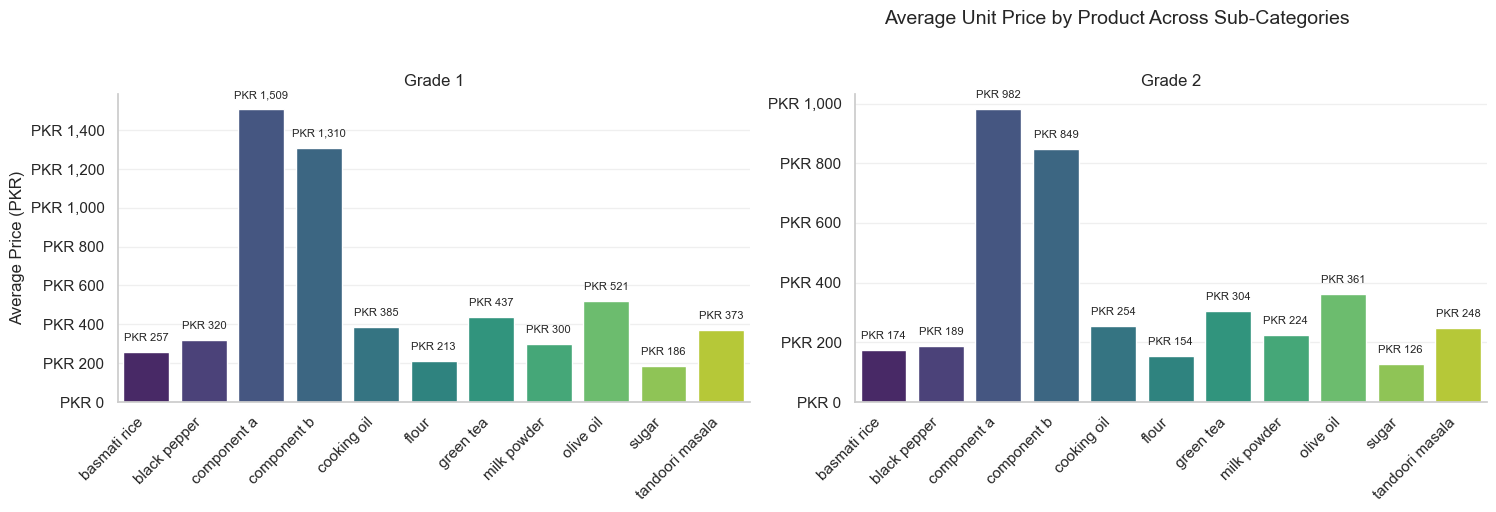

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Calculate average unit price per product within each sub-category
avg_prices = df.groupby(['Sub-Category', 'Product Name'])['Unit Price (PKR)'].mean().reset_index()

# Create faceted grid
g = sns.FacetGrid(
    avg_prices,
    col='Sub-Category',
    col_wrap=3,  # 3 columns per row
    height=5,
    aspect=1.5,
    sharey=False  # Allow different y-scales per sub-category
)

# Map barplot to each facet
g.map_dataframe(
    sns.barplot,
    x='Product Name',
    y='Unit Price (PKR)',
    hue='Product Name',
    palette='viridis',
    legend=False,
    dodge=False
)

# Add value labels and formatting
def annotate_bars(data, **kwargs):
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(
            f"PKR {p.get_height():,.0f}",
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', 
            va='center',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=8
        )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

g.map_dataframe(annotate_bars)

# Formatting
g.set_titles("{col_name}")
g.set_axis_labels("", "Average Price (PKR)")
g.fig.suptitle('Average Unit Price by Product Across Sub-Categories', y=1.02, fontsize=14)

# Format y-axes
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "PKR {:,.0f}".format(x)))
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 🏷️ Insights from Product Prices by Grade (Grade 1 vs Grade 2)

---

### 🔝 Grade 1 Products Are More Expensive
- **Example:** 
  - Component A: PKR 1,339 (Grade 1) vs PKR 982 (Grade 2)  
  - Cooking Oil: PKR 385 (Grade 1) vs PKR 254 (Grade 2)
- **Trend:** Grade 1 means **higher quality**, so it sells at a **higher price**.

---

### ⚙️ "Components" Are Always the Most Expensive
- **Component A & B** are the top-priced items in **both grades**.
- **Trend:** These are likely **specialized or high-value items**, important for revenue.

---

### 🔁 Same Products, Different Prices by Grade
- Many products like **basmati rice, black pepper, sugar** exist in both grades.
- **Price gaps vary:**  
  - Basmati Rice: Smaller gap  
  - Component A: Larger gap
- **Trend:** Customers may pay more for higher quality depending on the product.

---

### 🧂 "Sugar" and "Flour" Are Always Low-Priced
- Among the **cheapest items** in both grades.
- **Example:** Sugar → PKR 186 (Grade 1) vs PKR 120 (Grade 2)
- **Trend:** These are **basic, essential items** sold in large quantities at low prices.

---

### ✅ Summary
- **Grade 1 = Premium pricing**
- **Components = Highest value items**
- **Staples like sugar/flour = Low cost, high volume**


### 💰 Which sub-categories are driving higher average unit prices—and where might pricing strategies need a closer look?


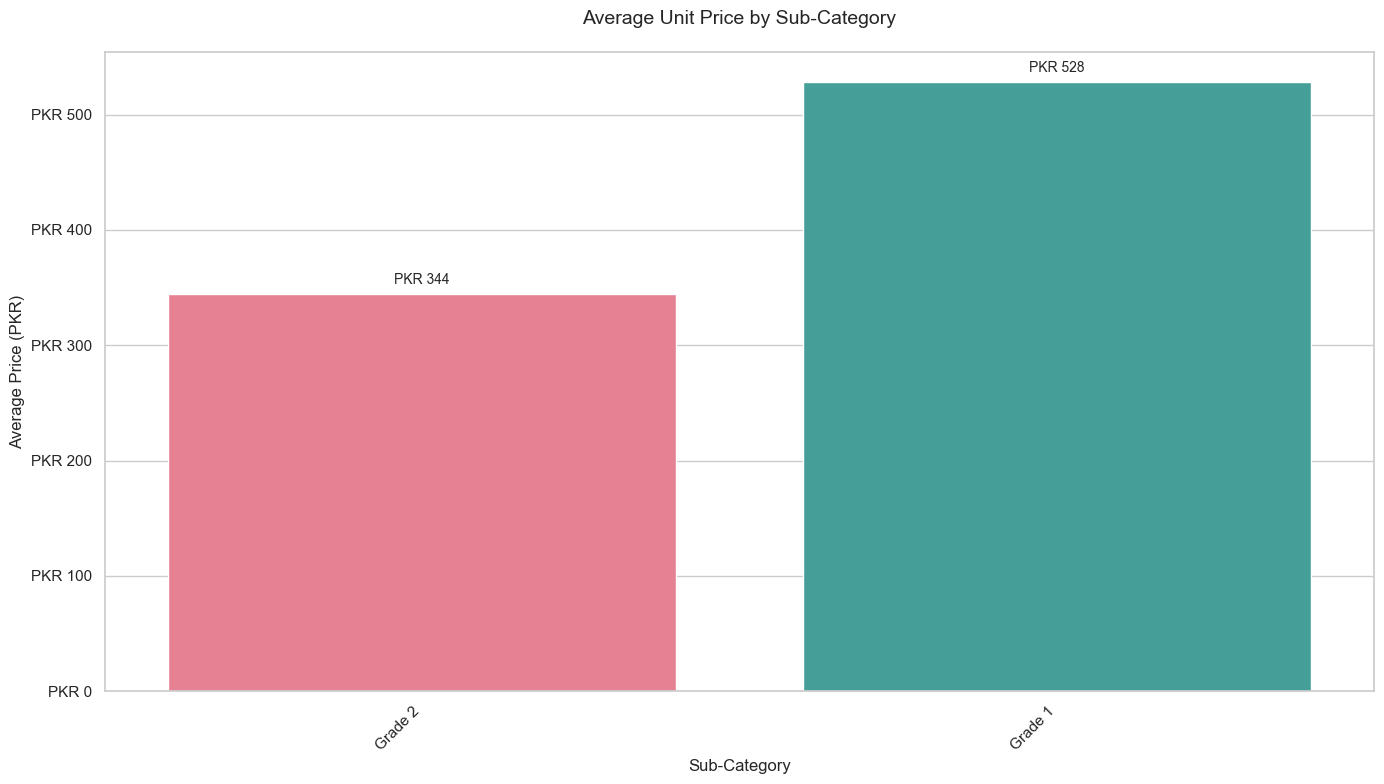

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Set style and figure size
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create bar plot with hue
ax = sns.barplot(
    x='Sub-Category',
    y='Unit Price (PKR)',
    hue='Sub-Category',
    data=df,
    palette="husl",
    estimator='mean',
    ci=None,
    dodge=False,
    legend=False
)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(
        f"PKR {p.get_height():,.0f}",
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=10
    )

# Customize plot
plt.title('Average Unit Price by Sub-Category', pad=20, fontsize=14)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Average Price (PKR)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Format y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "PKR {:,.0f}".format(x)))

# Adjust layout
plt.tight_layout()
plt.show()


## 📊 Insights from "Average Unit Price by Sub-Category" (Grade 1 vs Grade 2)

---

### 💰 Grade 1 Has Higher Price
- **Average Price:**  
  - Grade 1 → PKR 528  
  - Grade 2 → PKR 344
- **Price Gap:** ~53% higher for Grade 1
- **Insight:** Grade 1 products are **premium** and more expensive than Grade 2.

---

### 🧩 Market Segmentation by Quality
- Two clear options:  
  - Grade 1 → For customers wanting **higher quality**  
  - Grade 2 → For **budget-conscious** buyers
- **Trend:** Business targets **different customer groups** with these two grades.

---

### ✅ Summary
- Grade 1 = **Premium category**, higher price, higher revenue per unit  
- Grade 2 = **Standard category**, lower price  
- Customers choose based on **quality vs. price preference**


### 🌐 Which categories, suppliers, and products contribute the most to overall pricing—are there any high-value clusters worth deeper exploration?


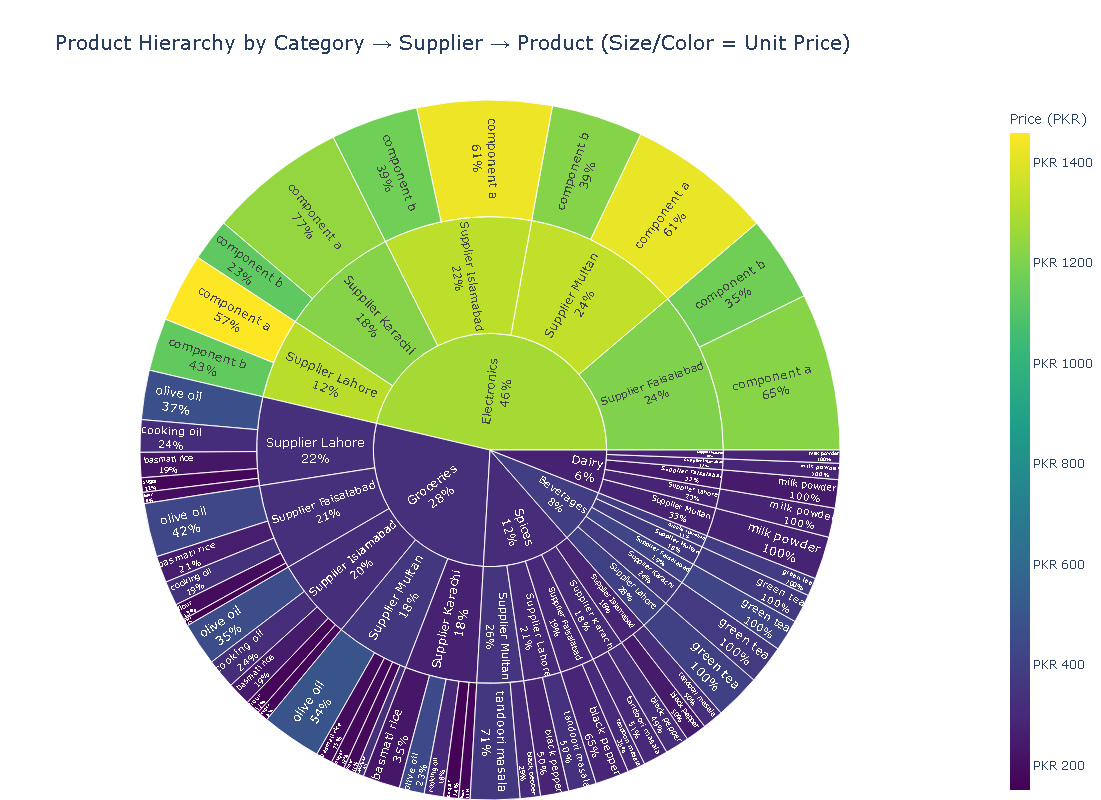

In [22]:
import plotly.express as px

# Create sunburst chart with hierarchical data
fig = px.sunburst(
    df,
    path=['Category', 'Supplier', 'Product Name'],  # Hierarchy: Category → Supplier → Product
    values='Unit Price (PKR)',                     # Size based on price
    color='Unit Price (PKR)',                      # Color intensity by price
    color_continuous_scale='Viridis',              # Professional color scale
    maxdepth=3,                                    # Show all 3 levels
    width=1200,                                    # Large figure width
    height=800,                                    # Large figure height
    title='Product Hierarchy by Category → Supplier → Product (Size/Color = Unit Price)'
)

# Enhance formatting
fig.update_layout(
    margin=dict(t=100, l=0, r=0, b=0),            # Adjust margins
    title_font_size=20,                            # Larger title
    coloraxis_colorbar=dict(                       # Customize color bar
        title='Price (PKR)',
        thickness=20,
        tickprefix='PKR ',
        ticksuffix=''
    )
)

# Add interactivity
fig.update_traces(
    textinfo='label+percent parent',               # Show name and percentage
    insidetextorientation='radial',                # Better text alignment
    hovertemplate='<b>%{label}</b><br>Price: PKR %{value:,.0f}<extra></extra>'
)

fig.show()

## 📊 Product Hierarchy Insights – Sunburst Chart

### 🧱 Category Overview (Center Layer)
- **Electronics** – 46% 🖥️ (Largest category)
- **Groceries** – 28% 🛒
- **Dairy** – 6% 🥛
- **Beverages** – 6% 🍵

---

### 🚚 Supplier Insights by Category

#### 🔌 Electronics:
- **Top Suppliers**: Islamabad (29%), Multan (24%), Faisalabad (24%)
- **Smaller Shares**: Karachi (13%), Lahore (12%)

#### 🛒 Groceries:
- More evenly split:
  - Lahore (22%), Faisalabad (21%), Islamabad (20%)
  - Multan (19%), Karachi (18%)

---

### 📦 Product Trends

#### 🔌 Electronics:
- **Component A** dominates for Islamabad, Multan, Faisalabad (60%+)
- **Karachi & Lahore** prefer **Component B** (up to 77%)

#### 🛒 Groceries:
- **Olive Oil** is the top product everywhere:
  - Karachi: 54% 🥇
  - Faisalabad: 42%, Islamabad: 40%
- Other items: Basmati Rice, Masoor Dal, Cooking Oil (19–26%)

#### 🥛 Dairy & 🍵 Beverages:
- 100% = Milk Powder (Dairy)
- 100% = Green Tea (Beverages)
- Extremely limited variety in both

---

### 🔍 Key Insights

- 📉 **Component Preference Varies**:
  - Most prefer **Component A**
  - **Karachi & Lahore** prefer **Component B**

- 🫒 **Olive Oil** is a key product in groceries
  - Especially in **Karachi** (54%)

- 📦 **Dairy & Beverage = Single Product**
  - Very narrow focus (only Milk Powder and Green Tea)

- 🧾 **Suppliers differ in focus**
  - Some work in multiple categories (e.g., Lahore, Faisalabad)

- 🎨 **Unit Price shown by size/color**
  - Larger/more intense segments likely mean higher price
  - Exact values not labeled

---

### ✅ Summary
- Focus is on **Electronics** and **Groceries**
- **Component A** and **Olive Oil** are most sold items
- **Dairy & Beverage** are very specialized
- Useful for improving **inventory**, **supplier planning**, and **marketing focus**


### 📊 Is there a visible relationship between available stock and unit price—and do certain products stand out due to high stock or premium pricing?


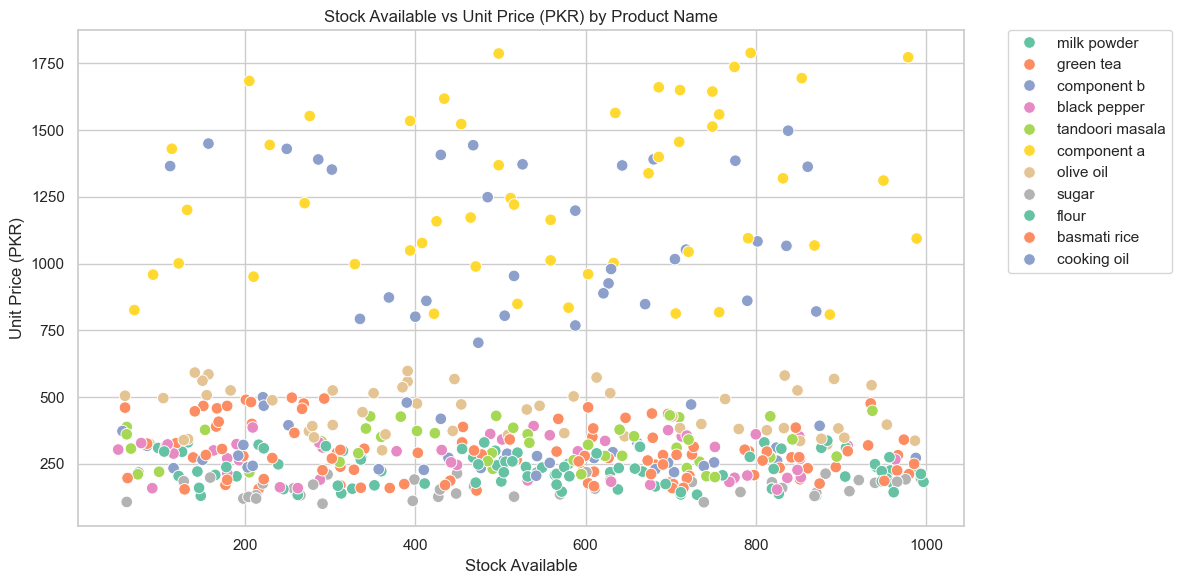

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Stock Available', y='Unit Price (PKR)', hue='Product Name', palette='Set2', s=70)

plt.title('Stock Available vs Unit Price (PKR) by Product Name')
plt.xlabel('Stock Available')
plt.ylabel('Unit Price (PKR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)  # Moves legend outside
plt.tight_layout()
plt.show()


# 📊 Stock vs. Unit Price: Easy Insights

This scatter plot shows how product prices and available stock compare. It helps identify which products are high-value and how much of them is in stock.

---

## 💰 High-Priced Products (Above PKR 750)

- 🟡 **Component A** – The most expensive product (PKR 1000–1750+)
- 🔵 **Cooking Oil** – High price range (PKR 750–1500)
- 🟣 **Component B** – Also expensive (PKR 750–1400)

✅ These are likely special or premium products, which is why they are priced higher.

---

## 🛍️ Low-Priced Products (Below PKR 600)

- 🟢 **Milk Powder**
- ⚫ **Green Tea**
- 🌸 **Black Pepper**
- 🟠 **Tandoori Masala**
- 🫒 **Olive Oil**
- ⚪ **Sugar**
- ⚫ **Flour**
- 🍚 **Basmati Rice**

✅ These are regular grocery items. Their prices stay low and don’t change much.

---

## 📉 Price vs. Stock – No Clear Link

- ❌ Expensive items don’t always have less stock.
- ❌ Cheap items don’t always have more stock.

👉 This means pricing is not based on stock level. It’s likely based on things like brand, product quality, or market demand.

---

## 📦 Stock Levels Are Well Spread

- Most products have stock ranging from 0 to 1000+ units.
- No product group shows extremely high or low stock only.

✅ This means inventory is well managed and balanced across different products.

---


## 📦 Insights from "Total Stock Available by Category"

---

### 🥇 Groceries Lead in Stock
- **Stock Units:** 122,213  
- **Insight:** Groceries have **more than double** the stock of any other category.
- **Trend:** Likely the **main focus** of the business or **high-demand items** with efficient supply.

---

### ⚖️ Mid-Tier: Electronics & Spices
- **Stock Units:**  
  - Electronics → 46,926  
  - Spices → 48,018  
- **Insight:** These categories are **important** but not dominant.
- **Trend:** Stocked to meet **steady, moderate demand**.

---

### 🥛 Low Stock: Dairy & Beverages
- **Stock Units:**  
  - Dairy → 27,015  
  - Beverages → 19,732  
- **Insight:** These may have **short shelf life**, **lower demand**, or **faster restocking cycles**.

---

### ✅ Summary
- **Groceries = High stock = High importance or demand**
- **Electronics & Spices = Balanced stock**
- **Dairy & Beverages = Low stock due to nature or demand**


---

## 📌 Final Summary & Recommendations

Based on the comprehensive analysis of product sales data, the following conclusions and insights have emerged:

### 🔍 Key Takeaways

- **Groceries dominate** in both stock availability and category volume, confirming their role as the business's core offering.
- **Top-selling products** like *Basmati Rice* and *Olive Oil* show high demand and regular turnover.
- **Grade 1 products consistently command higher prices** than Grade 2, indicating clear quality-based market segmentation.
- **High-value components** (like Component A & B) contribute most to revenue per unit, regardless of grade.
- **Staples like Sugar and Flour** remain low-cost but likely high-volume contributors.
- **Product prices are mostly clustered in the affordable range**, with only a few premium items driving the upper price band.
- **Stock levels vary by category**, likely based on shelf life, demand, and supply chain strategy.

### 💼 Business Implications

- Continue prioritizing **Groceries** for volume sales but monitor **high-margin components** for revenue optimization.
- Use **Grade-based pricing** to target different customer segments (budget vs premium).
- Revisit **stock planning** for perishable categories like Dairy and Beverages to reduce waste and improve targeted growth strategies.
